### Regression.
Simple linear regression is where you have a set of observations or points and you want to find the equation of the line that the points lie on. All straight lines can be expressed in the form $y = mx +c$ where m is the slope of the line and is how much $y$ increases when $x$ is increased by 1.0. The number $c$ is the y-intercept of the line and is the 
The hypothesis here is whether there is a linear relationship between the total bill and the tip amount.
Following the lecture notes for the moment.


There does appear to be a relationship between the variables but it doesn't look exactly linear. There are a lot of points in the right hand side of the plot.
Here I will look at using linear regression to analyse if there is a relationship between the bill amount and the tip amount. I am referring to the lecture notes and the jupyter notebook of the lecturer Dr Ian. The goal is to use the seaborn package for this but I will first go through the basics of linear regression. 
Having first investigated the data earler, the next step is to see if there is a model that fits the data. Find a cost function and use this to estimate the model parameter values that minimise the cost function.

Fitting the model:

To fit a straight line to the data you pick the best possible values for the paramters $m$ and $c$ to the model, that is the best parameters given the data observed. 

This is all based on the lecture notes and adapted for the Tips dataset.
Below  am using the average tip rate as an initial estimate of the slope $m$ of the line. The minimum tip is 1 dollar so I will use this as the intercept.


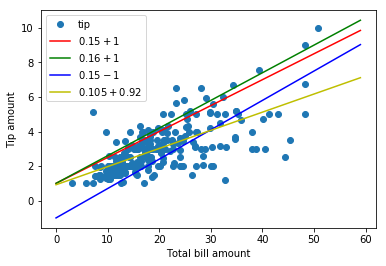

In [5]:
# overlay some lines on the plot
plt.plot(df.total_bill, df.tip, 'o')
x = np.arange(0, 60, 1)
plt.plot(x, .15 * x +1, 'r' , label=r"$0.15 + 1$")
plt.plot(x, .16 * x +1, 'g' , label=r"$0.16 + 1$")
plt.plot(x, .17 * x -1, 'b-', label=r"$0.15 - 1$" )
plt.plot(x, .105 * x +0.92, 'y-', label=r"$0.105 + 0.92$" )

# add a legend
plt.legend()

# add axis labels
plt.xlabel("Total bill amount")
plt.ylabel("Tip amount")

# show the plot
plt.show()

In [16]:
x= df.total_bill
y= df.tip
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (.10, 1.0, cost(0.10, 1.)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.11,  1.0, cost(0.11,  1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.15, 1.1, cost(0.15, 1.1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.10, 0.9, cost(0.10, 0.9)))

Cost with m =  0.10 and c =  1.00:   253.37
Cost with m =  0.11 and c =  1.00:   261.01
Cost with m =  0.15 and c =  1.10:   570.90
Cost with m =  0.10 and c =  0.90:   256.77


Having drawn several lines, the question now is which one roughly fits the data - that is which line is best and is there a better line? The best line is considered the one that minimises the following calculated value.
$$ \sum_i (y_i - mx_i - c)^2 $$. This is often referred to as the $Cost(m,c)$ and the line is the least squares line.

Each $y_i$ is the corresponding value to $x_i$ in the dataset. These are the measured values. The value $mx_i + c$ is what the model says that $y_i$ should have been. $y_i - mx_i - c$ is the difference between the observed $y_i$ values and the the value the model gives $(mx_i + c)$. These values are then squared.
We are looking for the values of $m$ and $c$  that give the lowest values for this cost function. We can plot the cost functions. 

Here $(x_i,y_i)$ is the ith point in Numpy's `polyfit` function to fit a one dimensional line

In [33]:
# calculate the best values for m and c

# First the means of total_bill and tips

x_avg = np.mean(df.total_bill)
y_avg = np.mean(df.tip)
print("mean bill amount is %.3f " %x_avg)
print("mean tip amount is %.3f " %y_avg)

## subtract means from each of the total_bill and tip values
x_zero= df['total_bill'] - np.mean(df['total_bill'])
y_zero= df['tip'] - np.mean(df['tip'])

# The best m is found by the following calculations:

m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# use m from above to calculate the best c

c = y_avg - m* x_avg

print("m is %8.6f and c is %6.6f." %(m,c))

mean bill amount is 19.786 
mean tip amount is 2.998 
m is 0.105025 and c is 0.920270.


### Using the numpy `polyfit` function

In [7]:
x = df['total_bill']
y = df['tip']
np.polyfit(x,y,1)

array([0.105 , 0.9203])

Going back up and plotting this line.
The best values for $m$ and $c$ given the tips data and using the least squares fitting are 0.105 for $m$ and 0.9203 for $c$.

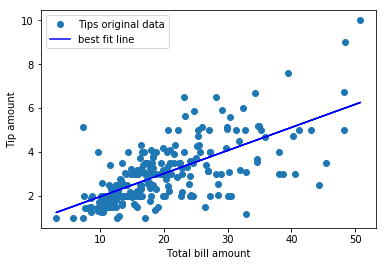

In [24]:
x = df.total_bill
y = df.tip
# plot the best fit line
plt.plot(x, y, 'o', label = "Tips original data")
#x = np.arange(0, 60, 1)

plt.plot(x, m*x + c, 'b-', label = "best fit line")
# add a legend
plt.legend()

# add axis labels
plt.xlabel("Total bill amount")
plt.ylabel("Tip amount")

# show the plot
plt.show()


Note that the $Cost$ of the best $m$ and the best $c$ is not zero in this case.

In [25]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  0.11 and c =  0.92:   252.79


A **cost function** is used to determine the best line to fit the data. However the data does not alway fit perfectly and therefore the cost is greater than zero. 
The coefficient of determination, also known as the R-squared value is related to the cost and is used to measure how much of the variance in $y$ is determined by $x$.

The R-squared value estimates how much of the changes in the $y$ value is due to the changes in the $x$ value compared to all of the other factors affecting the $y$ value. It is calculated as follows:
$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

Sometimes the Pearson correlation coefficient is used instead of the R-squared value. The Pearson coefficient can be squared to get the R-squared value.

In [35]:
# Calculate the R-squared value for our data set.
rsq = 1.0 - (np.sum((y - m * x - c)**2)/np.sum((y - y_avg)**2))

print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.4566


In [36]:
# The same value using numpy.
np.corrcoef(x, y)[0][1]**2

0.4566165863516758